In [170]:
# Install core libraries for data analysis and ML
!pip install numpy scikit-learn matplotlib seaborn --quiet

!pip install fastparquet
!pip install --upgrade pandas pyarrow




[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Configure display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

In [172]:
import pandas as pd

data_path = "data/frames/kepler_summary_with_labels.jsonl"

# JSONL = one JSON object per line
df = pd.read_json(data_path, lines=True)

print(f"✅ Loaded successfully! Rows: {len(df)}, Columns: {df.shape[1]}")
df.head()


✅ Loaded successfully! Rows: 50649, Columns: 59


,star_id,targettype,field,quarter,ra,dec,pm_ra,pm_dec,pm_total,gal_lat,gal_lon,start_time,end_time,umag,gmag,rmag,imag,zmag,gredmag,d51mag,jmag,hmag,kmag,kepmag,filter,npts,gkcolor,grcolor,jkcolor,reddening,extinction,eff_temp,surface_gravity,metallicity,radius,object_status,file_version,data_release,exposure,livetime,cdpp3_0,cdpp6_0,cdpp12_0,crowdsap,flfrcsap,pdcmethod,pdcvar,pdc_tot,pdc_totp,pdc_cor,pdc_corp,pdc_var,pdc_varp,pdc_noi,pdc_noip,pdc_ept,pdc_eptp,kepid,label
0,10000490,long cadence,The Kepler Field,0,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,120.529000,130.255731,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,476,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,8.954768,8.954768,88.5,84.0,75.5,0.9992,0.9794,regularMap,67.8812,0.8734,5.01,0.9909,76.77,0.9999,70.12,0.9999,97.66,NaN,NaN,10000490,FALSE POSITIVE
1,10000490,long cadence,The Kepler Field,1,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,131.502223,164.993863,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,1639,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,30.833573,30.833573,113.4,108.4,107.7,0.9992,0.9806,regularMap,134.8152,0.9989,98.33,0.9987,85.27,0.9999,88.07,0.9972,99.07,NaN,NaN,10000490,FALSE POSITIVE
2,10000490,long cadence,The Kepler Field,13,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,1182.726994,1273.066905,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,4421,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,83.170077,83.170077,191.8,187.5,180.0,0.9992,0.9803,multiScaleMap,42.5528,0.6728,0.90,0.9995,73.03,0.8910,5.75,0.8328,30.48,1.0,52.94,10000490,FALSE POSITIVE
3,10000490,long cadence,The Kepler Field,14,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,1274.129471,1371.332126,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,4757,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,89.488158,89.488158,253.7,187.5,180.0,1.0000,0.9803,multiScaleMap,92.8295,0.6306,1.35,0.9995,80.80,0.8636,2.09,0.9295,90.61,1.0,75.59,10000490,FALSE POSITIVE
4,10000490,long cadence,The Kepler Field,15,286.555989,46.957341,0.0,0.0,0.0,17.102994,77.482026,1373.477575,1471.146988,NaN,11.539,11.236,NaN,NaN,NaN,NaN,10.623,10.471,10.425,11.244,Kepler band pass,4780,1.114,0.303,0.198,NaN,NaN,6714.0,4.033,-0.08,1.906,4,6.1,25,89.917873,89.917873,253.7,229.3,211.1,1.0000,0.9663,regularMap,65.7252,0.6403,1.09,0.9990,69.87,0.9993,85.82,0.9998,99.70,1.0,54.44,10000490,FALSE POSITIVE


In [173]:
df['label'].value_counts()

label
FALSE POSITIVE    28415
CONFIRMED         13388
CANDIDATE          8846
Name: count, dtype: int64

In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50649 entries, 0 to 50648
Data columns (total 59 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   star_id          50649 non-null  int64  
 1   targettype       50649 non-null  object 
 2   field            50649 non-null  object 
 3   quarter          50649 non-null  int64  
 4   ra               50649 non-null  float64
 5   dec              50649 non-null  float64
 6   pm_ra            50521 non-null  float64
 7   pm_dec           50521 non-null  float64
 8   pm_total         50521 non-null  float64
 9   gal_lat          50649 non-null  float64
 10  gal_lon          50649 non-null  float64
 11  start_time       50649 non-null  float64
 12  end_time         50649 non-null  float64
 13  umag             0 non-null      float64
 14  gmag             50434 non-null  float64
 15  rmag             50623 non-null  float64
 16  imag             49829 non-null  float64
 17  zmag        

star_id                0
targettype             0
field                  0
quarter                0
ra                     0
dec                    0
pm_ra                128
pm_dec               128
pm_total             128
gal_lat                0
gal_lon                0
start_time             0
end_time               0
umag               50649
gmag                 215
rmag                  26
imag                 820
zmag                2936
gredmag            50649
d51mag              3375
jmag                 126
hmag                 126
kmag                 126
kepmag                12
filter                 0
npts                   0
gkcolor              341
grcolor              229
jkcolor              126
reddening           2903
extinction          2903
eff_temp             459
surface_gravity      459
metallicity          459
radius               459
object_status          0
file_version           0
data_release           0
exposure               0
livetime               0


In [175]:
# Keep only CONFIRMED and FALSE POSITIVE rows
df_filtered = df[df['label'].isin(['CONFIRMED', 'FALSE POSITIVE'])].copy()

# Check how many rows remain
print("Remaining rows:", len(df_filtered))
print(df_filtered['label'].value_counts())

df_filtered['label'] = df_filtered['label'].map({
    'CONFIRMED': 1,
    'FALSE POSITIVE': 0
})


Remaining rows: 41803
label
FALSE POSITIVE    28415
CONFIRMED         13388
Name: count, dtype: int64


In [176]:
keep_cols = [
    # --- Positional / Spatial ---
    "ra", "dec", "gal_lat", "gal_lon",

    # --- Photometric magnitudes (brightness) ---
    "gmag", "rmag", "imag", "zmag",
    "jmag", "hmag", "kmag", "kepmag",

    # --- Stellar parameters ---
    "eff_temp",          # Effective temperature
    "surface_gravity",   # log(g)
    "metallicity",       # [Fe/H]
    "radius",            # Stellar radius

    # --- Motion / kinematics ---
    "pm_ra", "pm_dec", "pm_total",  # proper motion

    # --- Noise and crowding metrics ---
    "cdpp3_0", "cdpp6_0", "cdpp12_0",  # Combined Differential Photometric Precision
    "crowdsap", "flfrcsap",            # crowding / contamination factors

    # --- PDC (Pre-search Data Conditioning) metrics ---
    "pdcvar", "pdc_tot", "pdc_cor",
    "pdc_var", "pdc_noi",

    # --- Observing information ---
    "quarter", "npts", "reddening", "extinction",

    # --- Colors (can indicate star type) ---
    "gkcolor", "grcolor", "jkcolor",
]


## Recomended 
keep_cols = [
    "label",
    "eff_temp", "surface_gravity", "metallicity", "radius",  # physical
    # "kepmag", "gmag", "rmag", "imag", "zmag", "jmag", "hmag", "kmag",  # photometric
    # "cdpp3_0", "cdpp6_0", "cdpp12_0",  # noise
    # "crowdsap", "flfrcsap",  # contamination
    # "pdc_var", "pdc_tot", "pdc_cor",  # variability
    "reddening", "extinction", 
    "gkcolor", "grcolor", "jkcolor",  # optional
    # "npts",  # data completeness
]


keep_cols2 = [
    # --- Basic identifiers (optional for traceability) ---
    "label",

    # --- Astrometric / spatial position ---
    # "ra", "dec", 
    # "gal_lat", "gal_lon",
    # "pm_ra", "pm_dec", "pm_total",   # proper motion info

    # --- Photometric magnitudes (raw, from catalog) ---
    # "gmag", "rmag", "imag", "zmag",  # optical
    # "jmag", "hmag", "kmag",          # infrared (2MASS)
    # "kepmag",                        # Kepler magnitude

    # --- Stellar physical parameters (from KIC/EPIC) ---
    "eff_temp",          # effective temperature
    "surface_gravity",   # log(g)
    "metallicity",       # [Fe/H]
    "radius",            # stellar radius
    "reddening",         # interstellar reddening E(B–V)
    "extinction",        # total extinction Av

    # # --- Derived but standardized catalog colors ---
    "gkcolor", "grcolor", "jkcolor",

    # --- Observation metadata that might still correlate with quality ---
    "npts",              # number of cadence points
]



In [177]:
df_binary = df_filtered[keep_cols].copy()

print("✅ Clean dataset shape:", df_binary.shape)
df_binary.head()

✅ Clean dataset shape: (41803, 10)


,label,eff_temp,surface_gravity,metallicity,radius,reddening,extinction,gkcolor,grcolor,jkcolor
0,0,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198
1,0,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198
2,0,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198
3,0,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198
4,0,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198


In [206]:
df_binary.isnull().sum()

label              0
eff_temp           0
surface_gravity    0
metallicity        0
radius             0
reddening          0
extinction         0
gkcolor            0
grcolor            0
jkcolor            0
dtype: int64

In [178]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # We'll visualize a few features at a time to avoid clutter
# numeric_cols = df_binary.drop(columns=['label']).select_dtypes(include=['float64', 'int64']).columns

# # Configure plot style
# sns.set(style="whitegrid", palette="muted", color_codes=True)

# # Plot each feature
# for col in numeric_cols:
#     plt.figure(figsize=(8, 4))
#     sns.boxplot(x='label', y=col, data=df_binary)
#     plt.title(f'Boxplot of {col} by Label (0=False Positive, 1=Confirmed)')
#     plt.xlabel("Label")
#     plt.ylabel(col)
#     plt.tight_layout()
#     plt.show()

In [179]:
# Separate target and features
X = df_binary.drop(columns=['label'])
y = df_binary['label']

print("✅ Features shape:", X.shape)
print("✅ Target shape:", y.shape)

# Quick check
X.head()

✅ Features shape: (41803, 9)
✅ Target shape: (41803,)


,eff_temp,surface_gravity,metallicity,radius,reddening,extinction,gkcolor,grcolor,jkcolor
0,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198
1,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198
2,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198
3,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198
4,6714.0,4.033,-0.08,1.906,NaN,NaN,1.114,0.303,0.198


In [180]:
corr = pd.DataFrame(X, columns=X.columns).assign(label=y).corr()['label'].sort_values(ascending=False)
print(corr.head(20))

label              1.000000
metallicity        0.239330
surface_gravity    0.170576
grcolor            0.112691
gkcolor            0.093638
jkcolor            0.040936
radius            -0.102314
eff_temp          -0.173009
extinction        -0.253880
reddening         -0.254034
Name: label, dtype: float64


In [181]:
# missing_summary = df_binary.isnull().mean().sort_values(ascending=False)
# missing_summary[missing_summary > 0]

In [182]:
df_binary = df_binary.fillna(df_binary.median(numeric_only=True))
df_binary.isnull().sum().sum()

np.int64(0)

In [183]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Select only numeric columns (non-numeric can't be correlated directly)
# df_num = df_binary.select_dtypes(include=['number'])

# # Compute correlation matrix
# corr = df_num.corr()

# # Plot
# plt.figure(figsize=(16, 12))
# sns.heatmap(
#     corr,
#     cmap="coolwarm",
#     center=0,
#     square=True,
#     linewidths=0.5,
#     cbar_kws={"shrink": 0.6},
# )
# plt.title("🔍 Correlation Heatmap — df_binary", fontsize=16)
# plt.show()


In [184]:
# Separate target and features
X = df_binary.drop(columns=['label'])
y = df_binary['label']

print("✅ Features:", X.shape, " Target:", y.shape)

# Quick check
X.head()

✅ Features: (41803, 9)  Target: (41803,)


,eff_temp,surface_gravity,metallicity,radius,reddening,extinction,gkcolor,grcolor,jkcolor
0,6714.0,4.033,-0.08,1.906,0.115,0.356,1.114,0.303,0.198
1,6714.0,4.033,-0.08,1.906,0.115,0.356,1.114,0.303,0.198
2,6714.0,4.033,-0.08,1.906,0.115,0.356,1.114,0.303,0.198
3,6714.0,4.033,-0.08,1.906,0.115,0.356,1.114,0.303,0.198
4,6714.0,4.033,-0.08,1.906,0.115,0.356,1.114,0.303,0.198


In [185]:
from sklearn.model_selection import train_test_split

# Step 1 — Split into training+validation vs test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape}")
print(f"Test: {X_test.shape}")


Train: (33442, 9)
Test: (8361, 9)


In [186]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   
X_train_scaled = X_train #scaler.fit_transform(X_train)
X_test_scaled = X_test #scaler.transform(X_test)
print(X_train_scaled.shape, X_test_scaled.shape)

(33442, 9) (8361, 9)


In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import numpy as np


In [188]:

# # Define the model
# rf = RandomForestClassifier(random_state=42)

# # Define parameter distributions
# param_dist = {
#     'n_estimators': randint(100, 1000),        # number of trees
#     'max_depth': [None, 5, 15, 30],        # depth of each tree
#     'min_samples_split': randint(2, 10),       # minimum samples to split a node
#     'min_samples_leaf': randint(1, 10),        # minimum samples in a leaf
#     'max_features': ['sqrt', 'log2', None],    # features considered at each split
#     'bootstrap': [True, False]                 # whether to use bootstrap samples
# }

# # Randomized Search setup
# rf_random = RandomizedSearchCV(
#     estimator=rf,
#     param_distributions=param_dist,
#     n_iter=5,                # number of random combinations to try
#     cv=3,                     # 3-fold cross-validation
#     scoring='accuracy',       # metric to optimize
#     verbose=1,
#     random_state=42,
#     n_jobs=-1                 # use all CPU cores
# )

# # Fit the search
# rf_random.fit(X_train_scaled, y_train)

# print("Best Parameters:", rf_random.best_params_)
# print("Best Cross-Validation Score:", rf_random.best_score_)

# # Evaluate best model on test set
# best_rf = rf_random.best_estimator_
# y_test_pred = best_rf.predict(X_test_scaled)
# from sklearn.metrics import classification_report
# print("Test Performance:\n", classification_report(y_test, y_test_pred))


In [189]:
# from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
# import seaborn as sns

# y_test_pred = best_rf.predict(X_test_scaled)
# print("Test Performance:\n", classification_report(y_test, y_test_pred))

# cm = confusion_matrix(y_test, y_test_pred)

# # Option 1: Using Seaborn heatmap
# plt.figure(figsize=(6,5))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#             xticklabels=['False Positive','Confirmed'],
#             yticklabels=['False Positive','Confirmed'])
# plt.xlabel('Predicted Label')
# plt.ylabel('True Label')
# plt.title('Confusion Matrix - Random Forest (Test Set)')
# plt.show()

Baseline Accuracy with ALL features: 0.9988
Test Performance:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      1.00      1.00      2678

    accuracy                           1.00      8361
   macro avg       1.00      1.00      1.00      8361
weighted avg       1.00      1.00      1.00      8361



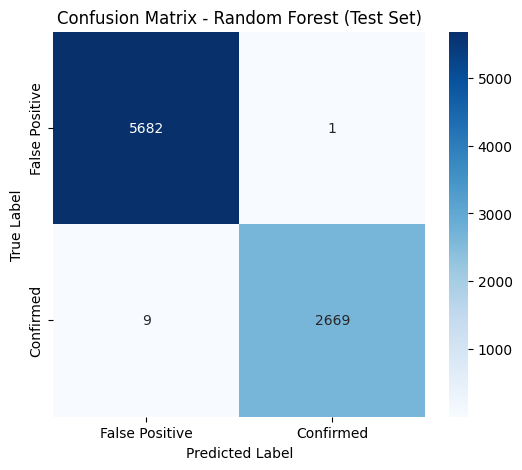

In [190]:
rf = RandomForestClassifier(n_estimators=291, random_state=42)
rf = RandomForestClassifier(
    bootstrap=False,
    max_depth=30,
    max_features='log2',
    min_samples_leaf=6,
    min_samples_split=3,
    n_estimators=291,
    random_state=42
)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
baseline_acc = accuracy_score(y_test, y_pred)

print(f"Baseline Accuracy with ALL features: {baseline_acc:.4f}")

y_test_pred = rf.predict(X_test_scaled)
print("Test Performance:\n", classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

# Option 1: Using Seaborn heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()

Threshold=0.00  Recall(Confirmed)=1.000  Accuracy=0.660
Threshold=0.02  Recall(Confirmed)=1.000  Accuracy=0.989
Threshold=0.04  Recall(Confirmed)=1.000  Accuracy=0.995
Threshold=0.06  Recall(Confirmed)=1.000  Accuracy=0.996
Threshold=0.08  Recall(Confirmed)=1.000  Accuracy=0.997
Threshold=0.10  Recall(Confirmed)=1.000  Accuracy=0.999
Threshold=0.12  Recall(Confirmed)=1.000  Accuracy=0.999
Threshold=0.14  Recall(Confirmed)=1.000  Accuracy=0.999
Threshold=0.16  Recall(Confirmed)=1.000  Accuracy=0.999
Threshold=0.18  Recall(Confirmed)=1.000  Accuracy=0.999
Threshold=0.20  Recall(Confirmed)=1.000  Accuracy=0.999
Threshold=0.22  Recall(Confirmed)=1.000  Accuracy=0.999
Threshold=0.24  Recall(Confirmed)=1.000  Accuracy=1.000
Threshold=0.26  Recall(Confirmed)=1.000  Accuracy=1.000
Threshold=0.28  Recall(Confirmed)=1.000  Accuracy=1.000
Threshold=0.30  Recall(Confirmed)=1.000  Accuracy=1.000
Threshold=0.32  Recall(Confirmed)=1.000  Accuracy=1.000
Threshold=0.34  Recall(Confirmed)=1.000  Accurac

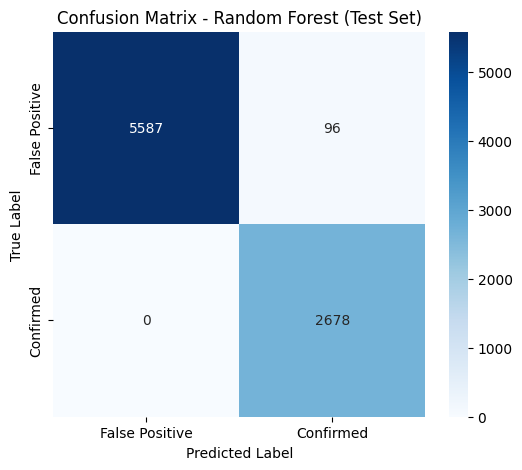

In [191]:
import numpy as np
from sklearn.metrics import (
    recall_score, precision_score, accuracy_score,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

y_prob = rf.predict_proba(X_test)[:, 1]

best_thr, best_recall, best_acc = 0.5, 0.0, 0.0

for thr in np.arange(0.0, 0.6, 0.02):
    y_thr = (y_prob > thr).astype(int)
    rec = recall_score(y_test, y_thr, pos_label=1)
    acc = accuracy_score(y_test, y_thr)
    print(f"Threshold={thr:.2f}  Recall(Confirmed)={rec:.3f}  Accuracy={acc:.3f}")

    # choose threshold that gives highest recall while keeping accuracy >= 0.91
    if (rec > best_recall) and (acc >= 0.98):
        best_recall, best_thr, best_acc = rec, thr, acc

print(f"\n🚀 Best threshold={best_thr:.2f}  Recall={best_recall:.3f}  Accuracy={best_acc:.3f}")

# final predictions
y_best = (y_prob > best_thr).astype(int)

print("\nFinal report with tuned threshold:\n", classification_report(y_test, y_best))

# text confusion matrix
cm = confusion_matrix(y_test, y_best)
print("\nConfusion Matrix:\n", cm)

# labeled confusion matrix
import pandas as pd
cm_df = pd.DataFrame(
    cm,
    index=['Actual False Positive', 'Actual Confirmed'],
    columns=['Predicted False Positive', 'Predicted Confirmed']
)
print("\nConfusion Matrix (labeled):")
print(cm_df)

# optional heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Random Forest (Test Set)')
plt.show()


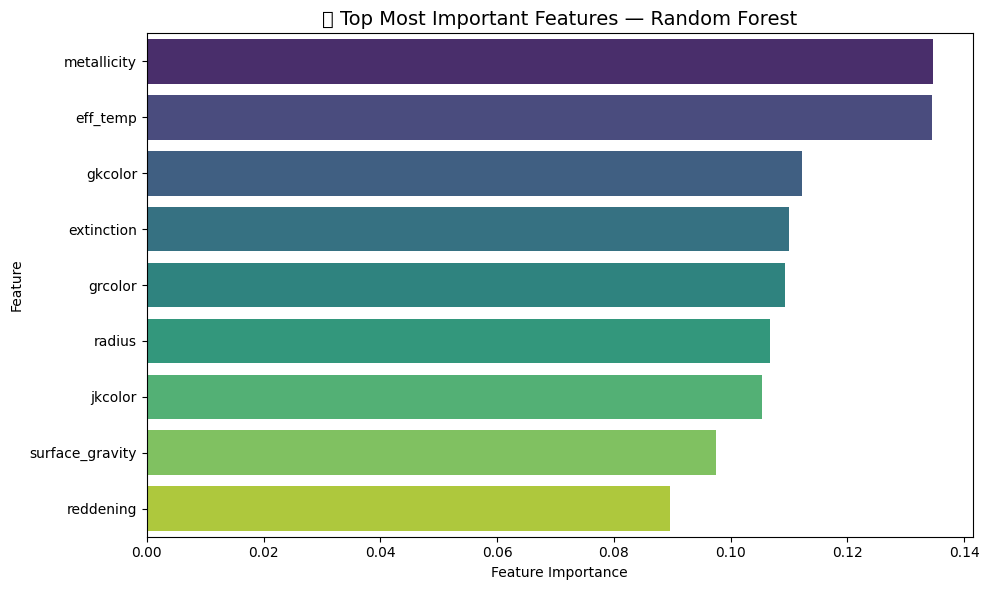

In [192]:
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# --- Plot top features ---
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importances,
    palette='viridis',
    hue='Feature',        # <— add this
    legend=False          # <— avoid duplicate color legend
)

plt.title("🌟 Top Most Important Features — Random Forest", fontsize=14)
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

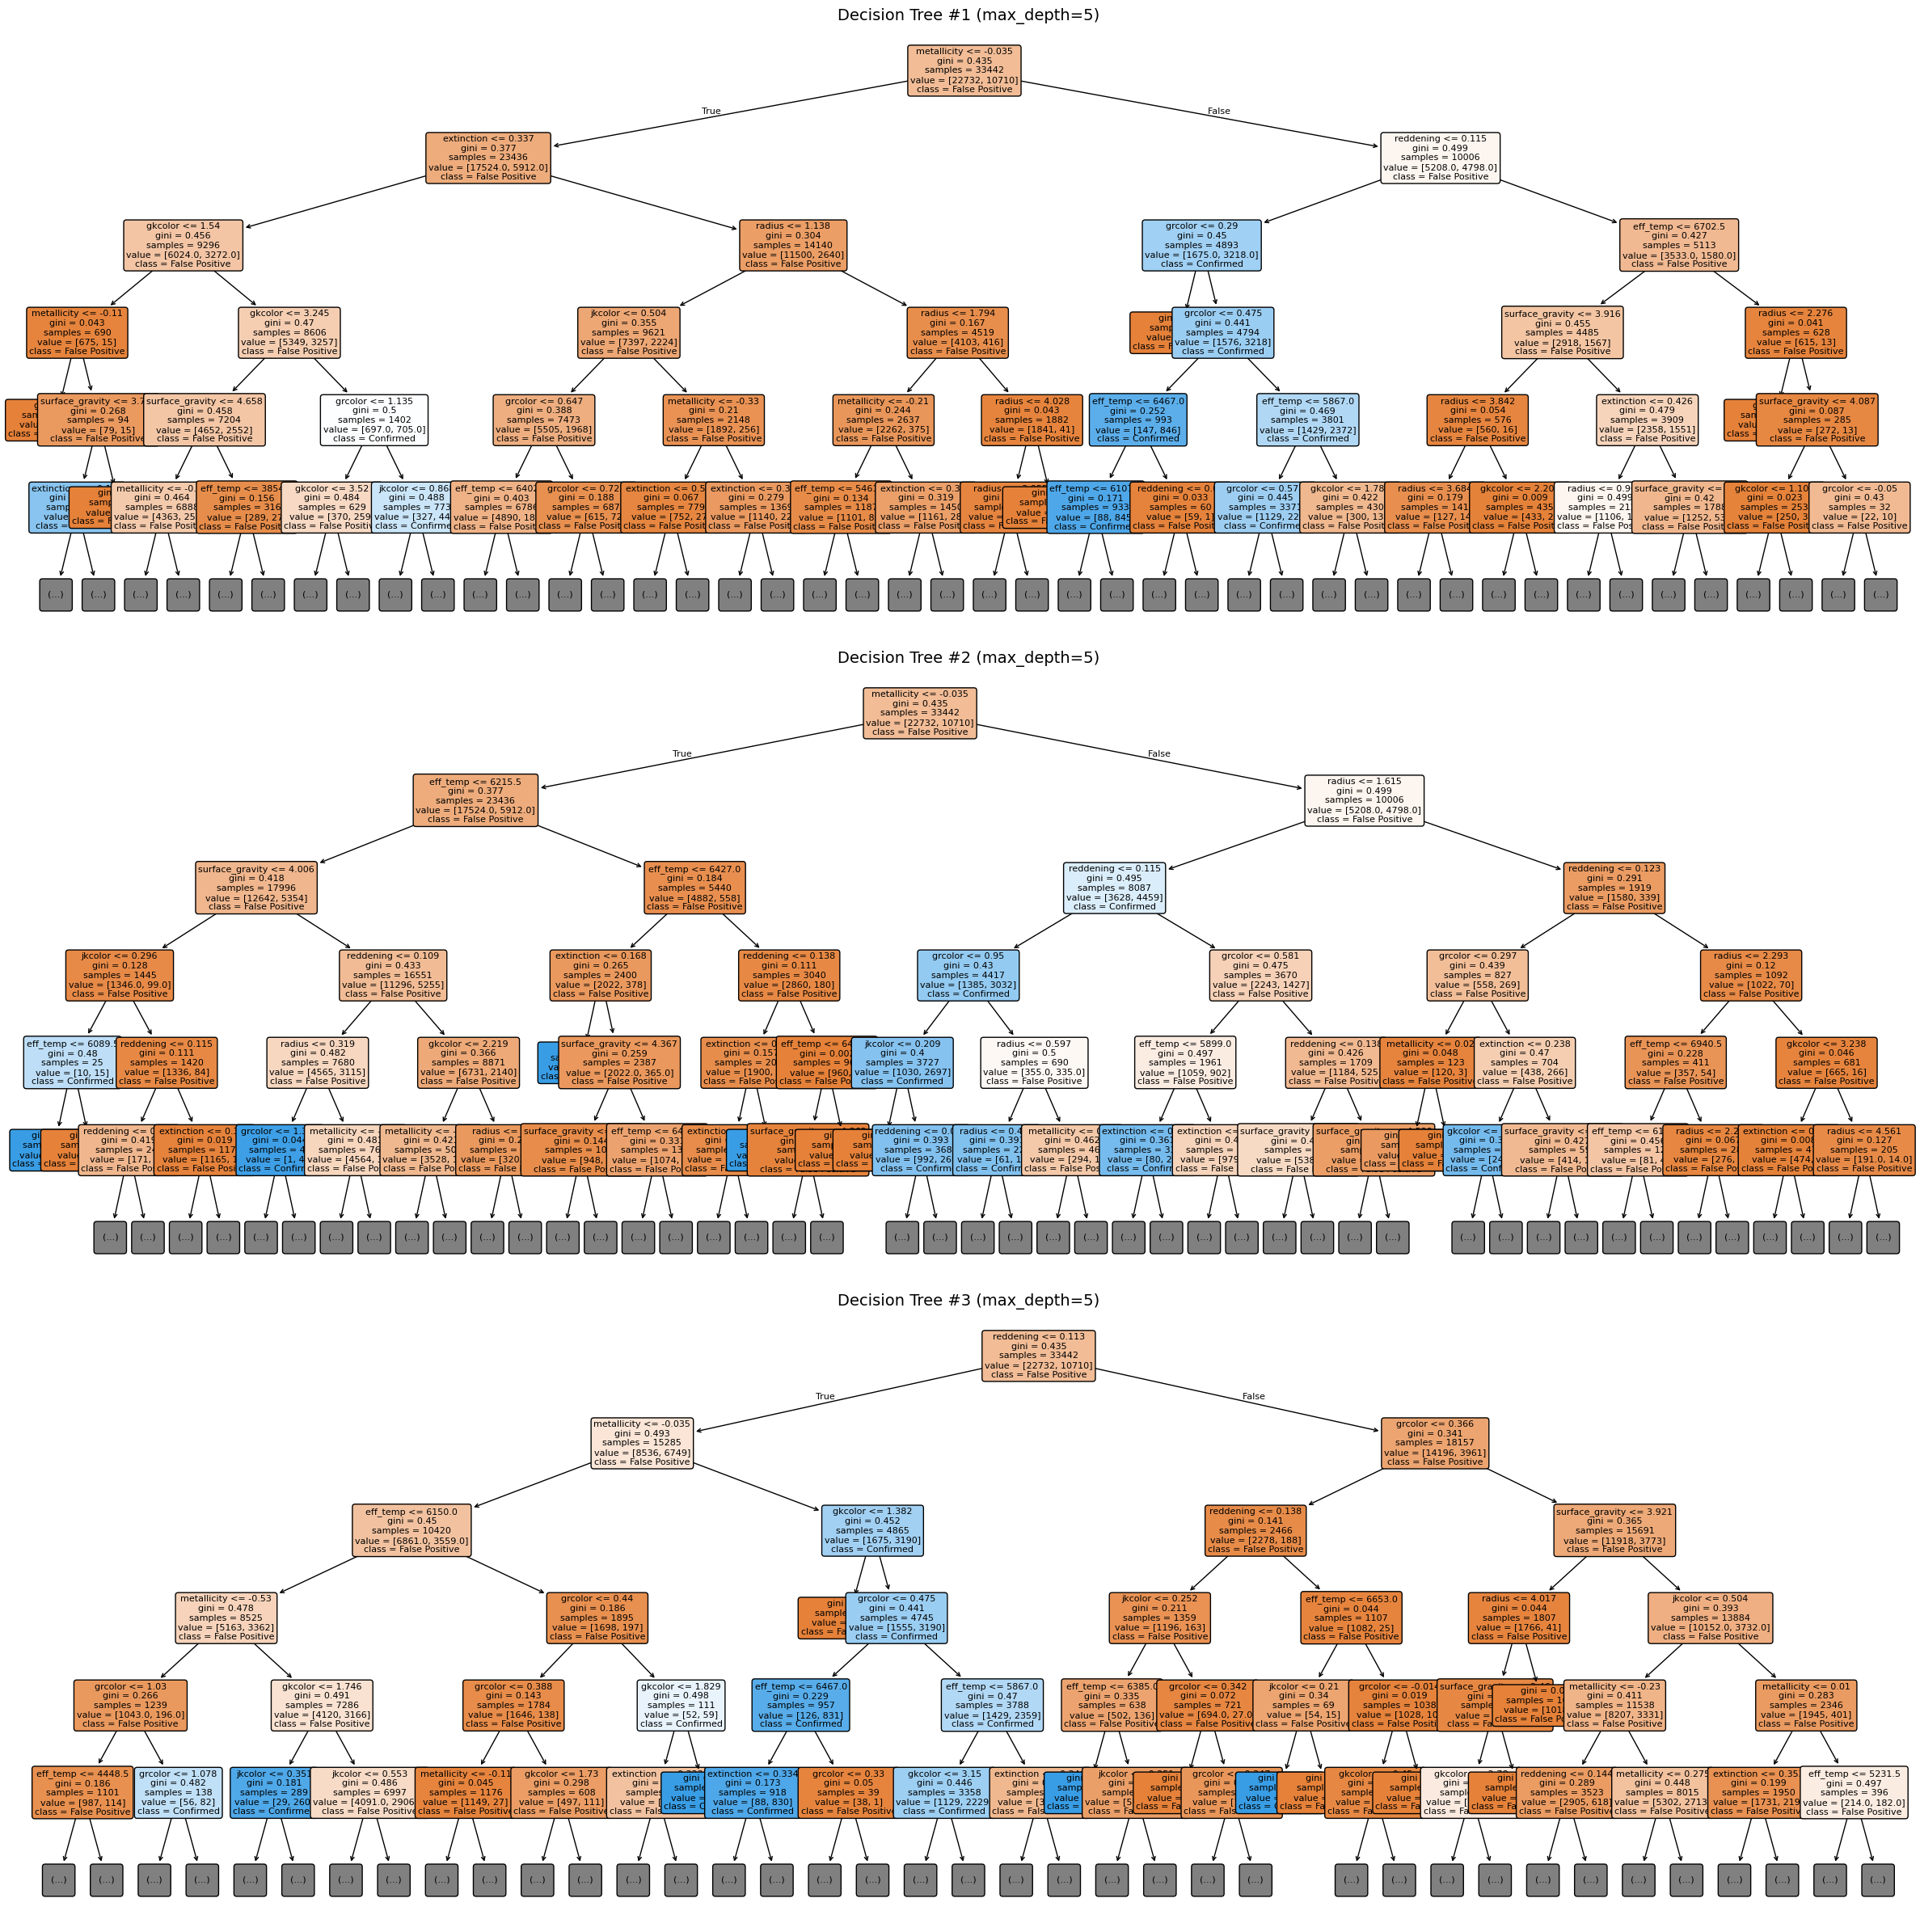

In [193]:
from sklearn import tree
import matplotlib.pyplot as plt

# How many trees to plot
n_trees_to_show = 3  # you can increase if your notebook can handle it
max_depth = 5       # limit for clarity

fig, axes = plt.subplots(n_trees_to_show, 1, figsize=(24, 8 * n_trees_to_show))

for i in range(n_trees_to_show):
    ax = axes[i] if n_trees_to_show > 1 else axes
    tree.plot_tree(
        rf.estimators_[i],
        feature_names=X.columns,
        class_names=['False Positive', 'Confirmed'],
        filled=True,
        rounded=True,
        fontsize=8,
        max_depth=max_depth,
        ax=ax
    )
    ax.set_title(f"Decision Tree #{i+1} (max_depth={max_depth})", fontsize=14)

plt.tight_layout()
plt.show()


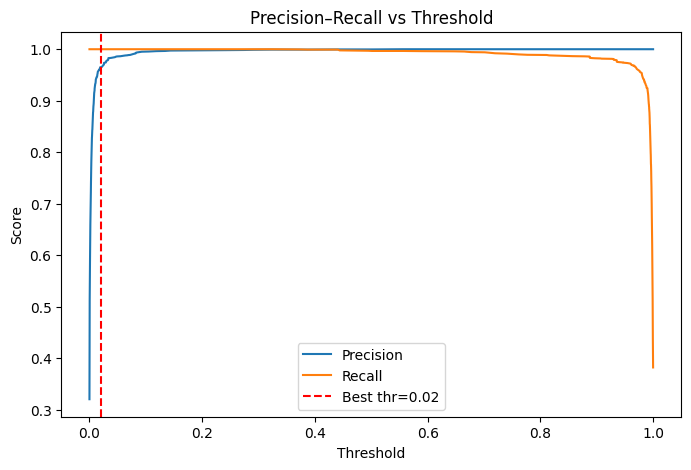

In [194]:
from sklearn.metrics import precision_recall_curve
prec, rec, thr = precision_recall_curve(y_test, y_prob)

plt.figure(figsize=(8,5))
plt.plot(thr, prec[:-1], label='Precision')
plt.plot(thr, rec[:-1], label='Recall')
plt.axvline(best_thr, color='r', ls='--', label=f'Best thr={best_thr:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision–Recall vs Threshold')
plt.legend()
plt.show()

Fitting 3 folds for each of 20 candidates, totalling 60 fits

🚀 Best Parameters:
{'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}

✅ Test Accuracy: 0.9997607941633776

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      1.00      1.00      2678

    accuracy                           1.00      8361
   macro avg       1.00      1.00      1.00      8361
weighted avg       1.00      1.00      1.00      8361



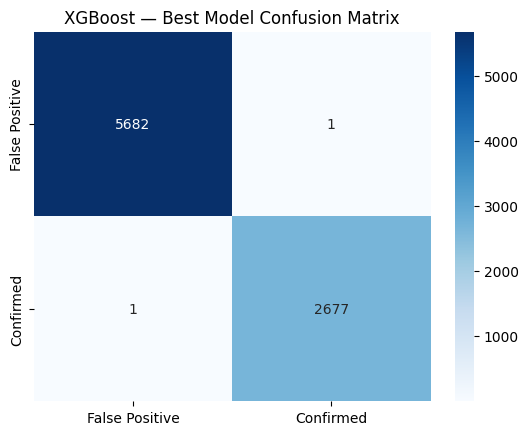

In [195]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np

# Define base model
xgb_base = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

# Define hyperparameter grid
param_dist = {
    'n_estimators': [200, 400, 600, 800, 1000],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# Randomized search (faster than GridSearchCV)
xgb_search = RandomizedSearchCV(
    estimator=xgb_base,
    param_distributions=param_dist,
    n_iter=20,  # number of random combinations
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit
xgb_search.fit(X_train_scaled, y_train)

print("\n🚀 Best Parameters:")
print(xgb_search.best_params_)

best_xgb = xgb_search.best_estimator_

# Evaluate
y_pred_best = best_xgb.predict(X_test_scaled)
print("\n✅ Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.title("XGBoost — Best Model Confusion Matrix")
plt.show()


In [196]:
from xgboost import to_graphviz
dot = to_graphviz(xgb, num_trees=0, rankdir='LR')
dot.render("xgb_tree_full", format="pdf")

'xgb_tree_full.pdf'

In [197]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, classification_report
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
models = {
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {
            "n_estimators": [200, 400, 600],
            "max_depth": [10, 20, 30, None],
            "min_samples_split": [2, 5, 10],
            "min_samples_leaf": [1, 2, 4],
            "max_features": ["sqrt", "log2"]
        }
    ),
    
    "XGBoost": (
        XGBClassifier(random_state=42, eval_metric='logloss'),
        {
            "n_estimators": [200, 400, 600],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [5, 7, 10],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0]
        }
    ),
    
    "LightGBM": (
        LGBMClassifier(random_state=42),
        {
            "n_estimators": [200, 400, 600],
            "learning_rate": [0.01, 0.05, 0.1],
            "max_depth": [5, 7, 10],
            "num_leaves": [31, 50, 70],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.6, 0.8, 1.0]
        }
    ),
    
    "CatBoost": (
        CatBoostClassifier(random_state=42, verbose=False),
        {
            "iterations": [400, 600, 800],
            "learning_rate": [0.01, 0.05, 0.1],
            "depth": [6, 8, 10],
            "l2_leaf_reg": [1, 3, 5]
        }
    )
}


In [199]:
best_models = {}
scoring_metric = "accuracy"  # or "recall" if you want to prioritize finding real exoplanets

for name, (model, params) in models.items():
    print(f"\n🔍 Tuning {name}...")
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=params,
        n_iter=10,          # increase for deeper search (20–50 for final)
        scoring=scoring_metric,
        cv=3,
        verbose=1,
        n_jobs=-1,
        random_state=42
    )
    search.fit(X_train_scaled, y_train)
    best_models[name] = search.best_estimator_
    print(f"✅ Best params for {name}: {search.best_params_}")
    print(f"Best CV {scoring_metric}: {search.best_score_:.4f}")



🔍 Tuning RandomForest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best params for RandomForest: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30}
Best CV accuracy: 0.9996

🔍 Tuning XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
✅ Best params for XGBoost: {'subsample': 1.0, 'n_estimators': 400, 'max_depth': 10, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Best CV accuracy: 0.9998

🔍 Tuning LightGBM...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 7140, number of negative: 15154
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000443 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2135
[LightGBM] [Info] Number of data points in the train set: 22294, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.320266 -> initsco


🔍 Evaluating RandomForest...
✅ Accuracy: 0.9999 | Recall (Confirmed): 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      1.00      1.00      2678

    accuracy                           1.00      8361
   macro avg       1.00      1.00      1.00      8361
weighted avg       1.00      1.00      1.00      8361


Confusion Matrix:
[[5683    0]
 [   1 2677]]

Confusion Matrix (Labeled):
                       Predicted False Positive  Predicted Confirmed
Actual False Positive                      5683                    0
Actual Confirmed                              1                 2677


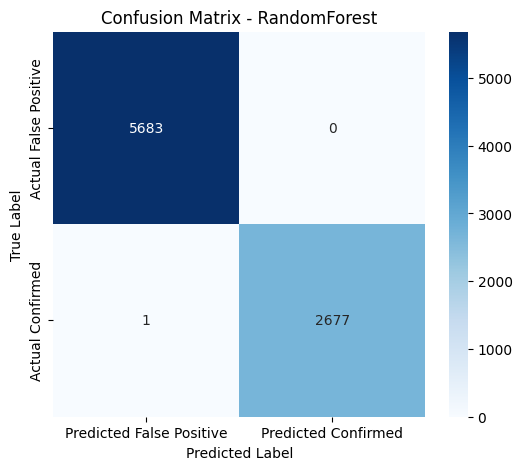


🔍 Evaluating XGBoost...
✅ Accuracy: 0.9999 | Recall (Confirmed): 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      1.00      1.00      2678

    accuracy                           1.00      8361
   macro avg       1.00      1.00      1.00      8361
weighted avg       1.00      1.00      1.00      8361


Confusion Matrix:
[[5683    0]
 [   1 2677]]

Confusion Matrix (Labeled):
                       Predicted False Positive  Predicted Confirmed
Actual False Positive                      5683                    0
Actual Confirmed                              1                 2677


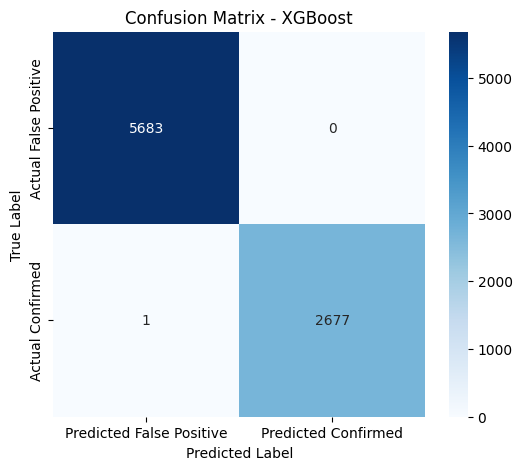


🔍 Evaluating LightGBM...
✅ Accuracy: 0.9999 | Recall (Confirmed): 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      1.00      1.00      2678

    accuracy                           1.00      8361
   macro avg       1.00      1.00      1.00      8361
weighted avg       1.00      1.00      1.00      8361


Confusion Matrix:
[[5683    0]
 [   1 2677]]

Confusion Matrix (Labeled):
                       Predicted False Positive  Predicted Confirmed
Actual False Positive                      5683                    0
Actual Confirmed                              1                 2677


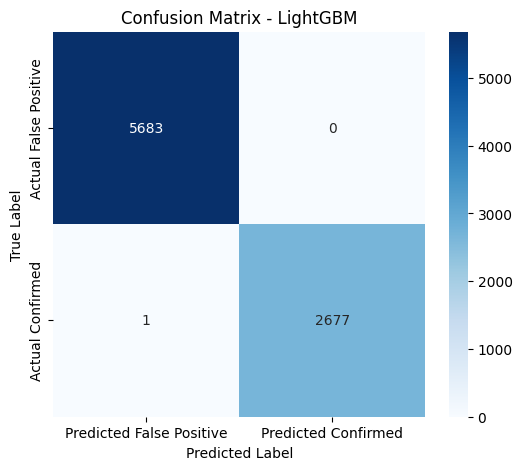


🔍 Evaluating CatBoost...
✅ Accuracy: 0.9999 | Recall (Confirmed): 0.9996

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5683
           1       1.00      1.00      1.00      2678

    accuracy                           1.00      8361
   macro avg       1.00      1.00      1.00      8361
weighted avg       1.00      1.00      1.00      8361


Confusion Matrix:
[[5683    0]
 [   1 2677]]

Confusion Matrix (Labeled):
                       Predicted False Positive  Predicted Confirmed
Actual False Positive                      5683                    0
Actual Confirmed                              1                 2677


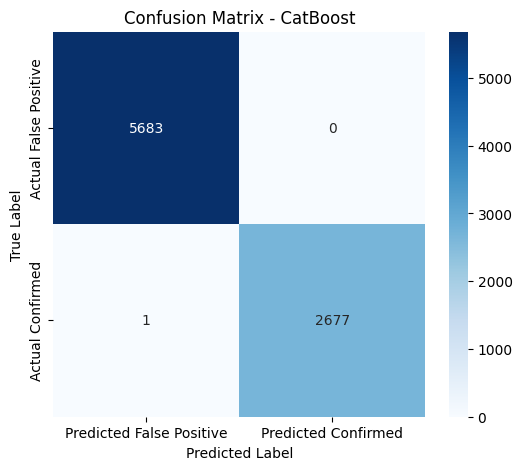


🏆 Model Comparison:
          Model  Accuracy    Recall
0  RandomForest   0.99988  0.999627
1       XGBoost   0.99988  0.999627
2      LightGBM   0.99988  0.999627
3      CatBoost   0.99988  0.999627


In [200]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score, recall_score, classification_report, confusion_matrix
)

results = []

for name, model in best_models.items():
    print(f"\n{'='*60}")
    print(f"🔍 Evaluating {name}...")
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred, pos_label=1)
    results.append((name, acc, rec))
    
    # Text summary
    print(f"✅ Accuracy: {acc:.4f} | Recall (Confirmed): {rec:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)
    
    # Labeled confusion matrix
    cm_df = pd.DataFrame(
        cm,
        index=['Actual False Positive', 'Actual Confirmed'],
        columns=['Predicted False Positive', 'Predicted Confirmed']
    )
    print("\nConfusion Matrix (Labeled):")
    print(cm_df)
    
    # Heatmap
    plt.figure(figsize=(6,5))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Summary Table
df_results = pd.DataFrame(results, columns=["Model", "Accuracy", "Recall"])
print("\n🏆 Model Comparison:")
print(df_results.sort_values(by="Accuracy", ascending=False))


In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build model architecture
model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification (0 or 1)
])

# Compile model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,   # part of train data used for validation
    epochs=100,
    batch_size=32,
    verbose=1
)


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np

# 🔹 1. Get predicted probabilities for the test set
y_pred_prob = model.predict(X_test_scaled)

# 🔹 2. Convert probabilities to binary class predictions (0 or 1)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# 🔹 3. Print classification report
print("🧾 Test Set Performance:")
print(classification_report(y_test, y_pred))

# 🔹 4. Print overall accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Test Accuracy: {acc:.4f}")


In [ ]:
!pip install keras-tuner --quiet

In [ ]:
import keras_tuner as kt
from tensorflow.keras import layers, models

def build_model(hp):
    model = models.Sequential()
    model.add(layers.Input(shape=(X_train_scaled.shape[1],)))
    
    # Tune number of hidden layers and neurons
    for i in range(hp.Int('num_layers', 1, 4)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        # Tune dropout rate
        model.add(layers.Dropout(hp.Float(f'dropout_{i}', 0.1, 0.5, step=0.1)))
    
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Tune learning rate for Adam
    lr = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,          # number of combinations to try
    executions_per_trial=1, # train each combo once
    directory='tuner_dir',
    project_name='exoplanet_dl_tuning'
)
tuner.results_summary()


In [ ]:
tuner.search(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=30,
    batch_size=32,
    verbose=1
)


In [ ]:
tuner.results_summary()

In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

print("\n🚀 Best Hyperparameters Found:")
for param, value in best_hp.values.items():
    print(f"{param}: {value}")

In [ ]:
best_model = tuner.hypermodel.build(best_hp)
history = best_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=150,        # increase from 30 → 150
    batch_size=16,     # smaller batch → more granular updates
    verbose=1
)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred_prob = best_model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).ravel()

# Metrics
print("🧾 Test Performance:\n", classification_report(y_test, y_pred))


In [ ]:
!pip install xgboost lightgbm catboost --quiet

In [ ]:
from sklearn.ensemble import  ExtraTreesClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# import seaborn as sns
# import matplotlib.pyplot as plt


# 🌳 Extra Trees (a stronger variant)
et = ExtraTreesClassifier(
    n_estimators=1000,
    max_depth=None,
    min_samples_split=4,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)

print("\n🧾 Extra Trees Report:")
print(classification_report(y_test, y_pred_et))
print("Accuracy:", accuracy_score(y_test, y_pred_et))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_et)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['False Positive','Confirmed'],
            yticklabels=['False Positive','Confirmed'])
plt.title('Extra Trees Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
